In [3]:
#Instalando libreiras
!pip install statsmodels

In [4]:
!pip install wquantiles

In [5]:
import pandas as pd #Manipulacion y analisis de datos
import numpy as np #Calculos matematicos
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns #graficas bonitas
import matplotlib.pyplot as plt #graficas

In [30]:
estado=pd.read_csv("/content/base_aviacion_1.csv")

In [31]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userid              50 non-null     int64 
 1   gender              50 non-null     object
 2   bookingchannel      50 non-null     object
 3   cabinclass          50 non-null     object
 4   complaints          50 non-null     int64 
 5   flightdistance_new  50 non-null     int64 
 6   ticketprice_new     50 non-null     int64 
 7   departuretime_new   50 non-null     int64 
 8   arrivaltime_new     50 non-null     int64 
 9   flightduration_new  50 non-null     int64 
 10  age_new             50 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 4.4+ KB


In [32]:
estado.head()

,userid,gender,bookingchannel,cabinclass,complaints,flightdistance_new,ticketprice_new,departuretime_new,arrivaltime_new,flightduration_new,age_new
0,1,Male,Phone,Business,0,825,598,7,16,52,24
1,2,Male,Online,First,9,1843,2211,1,15,590,60
2,3,Female,Agency,First,2,5465,631,12,20,573,47
3,4,Female,Phone,First,3,4448,995,13,21,1161,38
4,5,Male,Agency,Business,2,817,1284,10,17,28,10


In [33]:
estado.tail() #Vislumbra los 5 ultimos valores del dataframe

,userid,gender,bookingchannel,cabinclass,complaints,flightdistance_new,ticketprice_new,departuretime_new,arrivaltime_new,flightduration_new,age_new
45,46,Male,Online,First,4,3535,571,21,15,421,42
46,47,Female,Online,Business,1,1126,1899,4,4,822,20
47,48,Male,Online,Business,5,2671,556,2,16,19,33
48,49,Male,Online,Business,7,1571,980,13,10,610,35
49,50,Male,Phone,Economy,4,3031,2150,24,17,369,12


In [34]:
estado.sample(5)#Elige 5 datos registros al azar

,userid,gender,bookingchannel,cabinclass,complaints,flightdistance_new,ticketprice_new,departuretime_new,arrivaltime_new,flightduration_new,age_new
42,43,Female,Agency,First,0,5314,1044,3,9,694,3
29,30,Male,Phone,First,6,2158,422,17,3,563,3
32,33,Female,Agency,Business,8,1420,1334,6,24,714,5
4,5,Male,Agency,Business,2,817,1284,10,17,28,10
39,40,Female,Phone,Business,9,2339,1789,9,18,165,28


In [35]:
estado.columns #Nombre de las columnas

Index(['userid', 'gender', 'bookingchannel', 'cabinclass', 'complaints',
       'flightdistance_new', 'ticketprice_new', 'departuretime_new',
       'arrivaltime_new', 'flightduration_new', 'age_new'],
      dtype='object')

In [36]:
list(estado.columns)

['userid',
 'gender',
 'bookingchannel',
 'cabinclass',
 'complaints',
 'flightdistance_new',
 'ticketprice_new',
 'departuretime_new',
 'arrivaltime_new',
 'flightduration_new',
 'age_new']

In [37]:
estado.describe() #Estadisticas descriptivas

,userid,complaints,flightdistance_new,ticketprice_new,departuretime_new,arrivaltime_new,flightduration_new,age_new
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.00000
mean,25.50000,4.540000,2756.820000,1013.420000,11.780000,13.62000,542.700000,28.60000
std,14.57738,3.189332,1446.060499,563.524191,6.984794,6.85086,359.773072,18.18499
min,1.00000,0.000000,250.000000,46.000000,1.000000,1.00000,7.000000,2.00000
25%,13.25000,2.000000,1581.500000,572.500000,6.000000,8.25000,218.000000,12.00000
50%,25.50000,4.000000,2791.000000,1006.000000,12.000000,15.50000,569.500000,28.00000
75%,37.75000,7.750000,3611.500000,1403.250000,17.750000,18.75000,830.500000,41.25000
max,50.00000,10.000000,5499.000000,2211.000000,24.000000,24.00000,1161.000000,62.00000


##2. Analizar medidas de tendencia central

In [38]:
estado.columns

Index(['userid', 'gender', 'bookingchannel', 'cabinclass', 'complaints',
       'flightdistance_new', 'ticketprice_new', 'departuretime_new',
       'arrivaltime_new', 'flightduration_new', 'age_new'],
      dtype='object')

In [39]:
estado['flightdistance_new'].mean() #Tomas una feature

2756.82

In [40]:
trim_mean (estado["flightdistance_new"], 0.1)

2703.275

In [41]:
estado["flightduration_new"].mean()

542.7

In [42]:
trim_mean(estado["flightduration_new"], 0.1)

535.575

In [43]:
#Media ponderada
np.average(estado['flightdistance_new'], weights=estado['flightdistance_new'])

3500.1652846395486

In [44]:
np.average(estado['flightduration_new'], weights=estado['flightduration_new'])

776.4348995761931

In [45]:
estado.head()

,userid,gender,bookingchannel,cabinclass,complaints,flightdistance_new,ticketprice_new,departuretime_new,arrivaltime_new,flightduration_new,age_new
0,1,Male,Phone,Business,0,825,598,7,16,52,24
1,2,Male,Online,First,9,1843,2211,1,15,590,60
2,3,Female,Agency,First,2,5465,631,12,20,573,47
3,4,Female,Phone,First,3,4448,995,13,21,1161,38
4,5,Male,Agency,Business,2,817,1284,10,17,28,10


<Axes: >

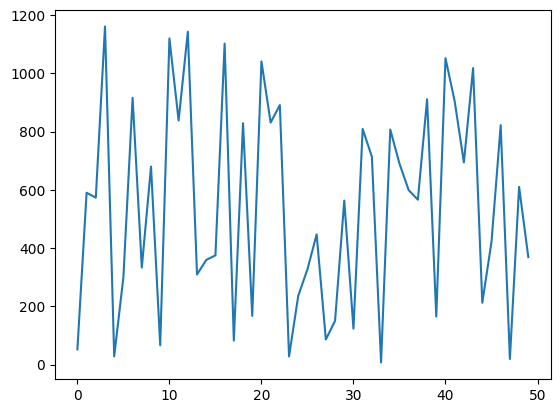

In [46]:
estado['flightduration_new'].plot.line()

<Axes: >

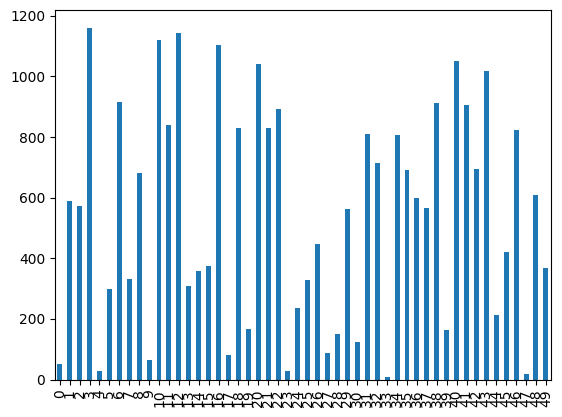

In [47]:
estado['flightduration_new'].plot.bar()

<Axes: >

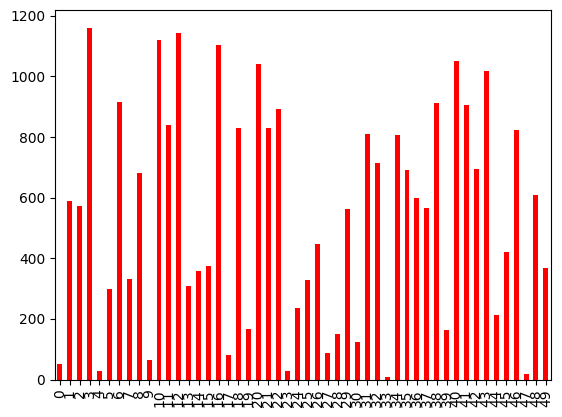

In [48]:
estado['flightduration_new'].plot.bar(color='red')

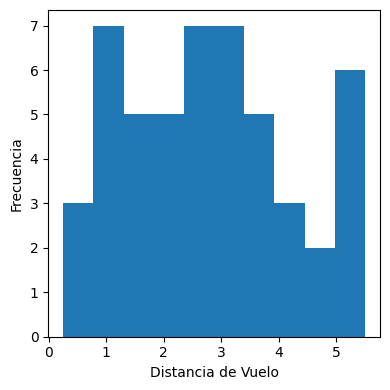

In [51]:
ax=(estado.flightdistance_new/1_000).plot.hist(figsize=(4,4))
ax.set_xlabel("Distancia de Vuelo")
ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

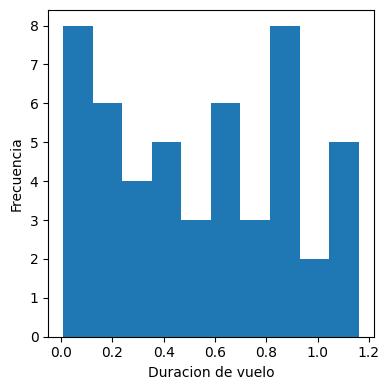

In [53]:
ax=(estado["flightduration_new"]/1_000).plot.hist(figsize=(4,4))
ax.set_xlabel("Duracion de vuelo")
ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()